<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:200%;
           font-family:Arial;letter-spacing:0.5px">

<p width = 20%, style="padding: 10px;
              color:white;">
Distributions: Part II
              
</p>
</div>

Data Science Cohort Live NYC Feb 2022
<p>Phase 2: Topic 12</p>
<br>
<br>

<div align = "right">
<img src="Images/flatiron-school-logo.png" align = "right" width="200"/>
</div>
    
    

#### The normal distribution
- Why do people care so much about this distribution?

Sum of N independent, random variables each following same distribution:
$$ S = X_1 + X_2 + ... + X_N $$


Let each $X_i$ be the result of a Bernoulli trial:

<img src = "Images/simple_bernoulli.png" width = 500>

- $S$ would be how many steps right under $N$ trials.
- What kind of distribution?

Binomial!
3 trials.

In [13]:
from scipy.stats import binom
import matplotlib.pyplot as plt
N = 3
p = 0.5

pmf_binomial = [(x, binom.pmf(x, n = N, p = p)) 
                for x in range(0,10)]

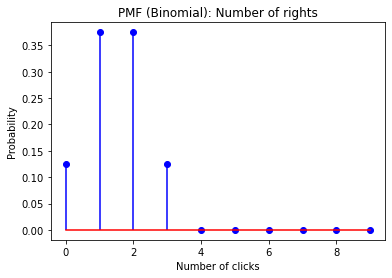

In [14]:
x,y = list(zip(*pmf_binomial))
plt.stem(x, y, linefmt='b-', markerfmt='bo', basefmt='r-')
plt.xlabel('Number of clicks')
plt.ylabel('Probability')
plt.title('PMF (Binomial): Number of rights')
plt.show()

Plot it for actual distance deviation:

$$ d = n_R - n_L = n_R - (N-n_r)$$

In [15]:
import numpy as np
N = 3
p = 0.5

pmf_deviation = [(x - (N - x), binom.pmf(x, n = N, p = p)) 
                for x in np.arange(-5,5,1)]

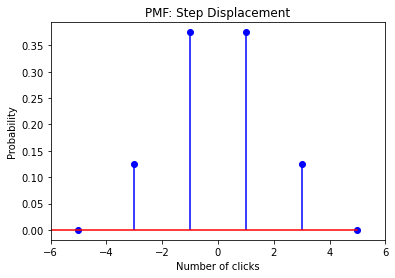

In [16]:
x,y = list(zip(*pmf_deviation))
plt.stem(x, y, linefmt='b-', markerfmt='bo', basefmt='r-')
plt.xlabel('Number of clicks')
plt.ylabel('Probability')
plt.title('PMF: Step Displacement')
plt.xlim(-6,6)
plt.show()

When $N$ gets sufficiently big:

In [17]:
from IPython.display import YouTubeVideo

galton_video = YouTubeVideo('Vo9Esp1yaC8', width = 800, height = 600)

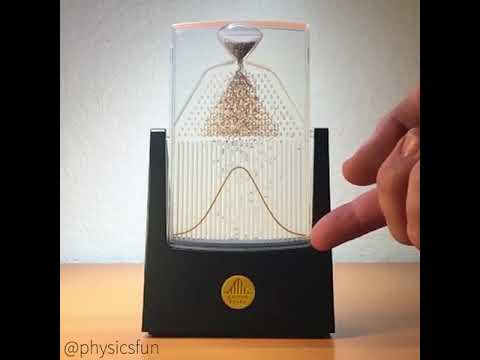

In [18]:
display(galton_video)

- If make slits finer, and $N \rightarrow \infty$ :
- Histogram becomes the continuous normal pdf.

**Most distributions satisfying weak requirements**:
- Finite variance.
- Defined mean.

Bernoulli was an underlying distribution that satisfied this.

Sum of random variables drawn from these distribution follows normal distribution as N goes large.

#### Known as: The central limit theorem

Take N = 200 samples of waiting times of drivers at a toll:

- Follows exponential distribution with average wait time $\tau$
- Has finite variance $\tau^2$.

In [19]:
from scipy.stats import expon

#assume population mean 3 minutes
pop_mean = 3

wait_time_sample = expon.rvs(loc = pop_mean/2, scale = pop_mean/2, size = 50)

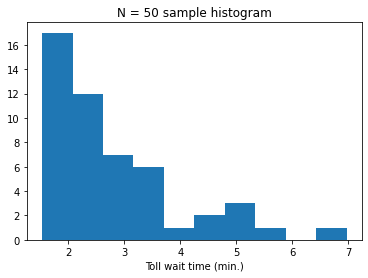

In [20]:
plt.hist(wait_time_sample)
plt.xlabel('Count')
plt.xlabel('Toll wait time (min.)')
plt.title('N = 50 sample histogram')
plt.show()


Obviously, not normal distributed.

- Want statistics/uncertainty of the **sample mean** as we repeat for many trials of samples with N = 50.

$$ \bar{T} = \frac{1}{N}\sum_{i=1}^{N}T_i $$

- Here N = 50
- Apart from factor of (1/N), this is a sum of random variables!

##### Create a list of 500 trials of these N = 50 samples from exponential distribution.

In [21]:
pop_mean = 3
many_sample_trials = [expon.rvs(loc = pop_mean/2, scale = pop_mean/2, size = 50) for trial in range(10000)]
many_sample_trials[0:2]

[array([3.07284529, 1.96784573, 2.34229114, 3.48132019, 3.90555538,
        1.88310872, 4.05884293, 2.73558729, 1.54422474, 6.18969408,
        2.53785122, 2.19958655, 1.66260386, 2.35152186, 1.81228734,
        2.34118531, 1.79884035, 4.46575361, 1.58186126, 1.90005583,
        5.5804628 , 2.90453013, 4.40061757, 2.37013832, 3.40744844,
        2.18432396, 1.67019945, 4.58534522, 1.67727534, 2.3434608 ,
        6.70065598, 2.00514602, 1.75889492, 2.70108805, 1.91967392,
        5.81733782, 1.76922641, 1.57693732, 1.81386963, 3.49578175,
        2.72781218, 2.05194056, 5.20387919, 2.25202358, 1.51229623,
        3.70643954, 1.62035661, 2.20198537, 3.77910637, 2.38475243]),
 array([4.45808645, 3.05823451, 1.92077926, 3.21337445, 1.99916905,
        2.10354566, 4.66330259, 4.66863871, 2.05793154, 2.96095676,
        3.76462574, 2.17922352, 1.65906003, 4.22728591, 3.52789467,
        1.97245845, 2.64923382, 1.6563296 , 1.73179267, 4.16378859,
        1.73211687, 4.7133293 , 3.56874958, 1.

Return list of sample means:

In [22]:
sample_mean_list = [sample.mean() for sample in many_sample_trials]
len(sample_mean_list)

10000

What does the distribution of means look like?

$$ \bar{T} = \frac{1}{N}\sum_{i=1}^{N}T_i $$

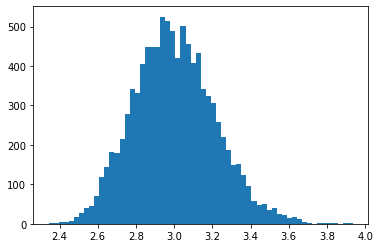

In [23]:
plt.hist(sample_mean_list, bins = "auto")
plt.show()

**The distribution of mean of a sample follow normal distribution**

- Regardless of underlying population distribution.

This is a very large reason why normal distribution is so important!

#### Standard Normal Distribution

- Often useful to rescale normal by mean/std.
- New rescaled normal has mean of 0 and variance of 1.
- Z-distribution.

We simply subtract the mean $\mu$ from each value and then divide by the standard deviation $\sigma$:

$$z = \frac{x - \mu}{\sigma}$$

We call this process **standardization**.

Mathematical form for pdf:
$$ N(x | \mu, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x-\mu)^2}{2\sigma^2}} $$

- $\mu$ is mean.
- $\sigma$ is standard deviation.

Scaled transformation:
$$ \frac{1}{\sqrt{2\pi}}e^{-\frac{z^2}{2}} $$

<center><img src = "Images/rescale_normal.png" width = 500></center>

#### $z$-Score

A **$z$-score** for a data point $x$ (in a normal distribution) is simply the distance to the mean in units of standard deviations

$$\large z = \frac{x - \mu}{\sigma}$$

By calculating the z-score of an individual point, we can see how unlikely a value is.

#### The Empirical Rule

- $68\%$ of the values of a normal distribution: lie within 1 standard deviation ($\sigma$) of the mean.
- $95\%$ within $2\sigma$.
- $99.7\%$ within $3\sigma$.  

mean 5 std dev 1,3,5
percentage values lie within a range X = plus/minus 11.2

In [25]:
from scipy.stats import norm

In [43]:
for i in [1,2,4,8,16,32,64]:
    z_score = (11.2 - 5)/i
    print('Percentage of values within '+str(i)+' standard deviations is')
    print(norm.cdf(z_score)-norm.cdf(-z_score))

Percentage of values within 1 standard deviations is
0.9999999994353683
Percentage of values within 2 standard deviations is
0.9980647935735634
Percentage of values within 4 standard deviations is
0.878858483995882
Percentage of values within 8 standard deviations is
0.5616603404132452
Percentage of values within 16 standard deviations is
0.3016139150742845
Percentage of values within 32 standard deviations is
0.15362836076194125
Percentage of values within 64 standard deviations is
0.07717433748192198
